In [1]:
from sensor import sensor as sens
from actuator import actuator as act
from threshold import threshold as thr
from manager import manager
from signal_input import signal_input
import wire
from graphviz import Source, render

In [2]:
#Create manager that holds the threshold device
mng = manager(verbose = True)
#Create an input node
sns = sens(mng,(1,1))
#Create threshold nodes
t1 = thr(mng,1)
t2 = thr(mng,1)
t3 = thr(mng,2)
t4 = thr(mng,2)
t5 = thr(mng,1)
#Create output node/actuator
out = act(mng)

In [3]:
#Define connections between nodes 0-activate , 1-inhibit
t1.add_consumer(t2,1)# t1 --| t2
t2.add_consumer(t3,0)# t2 --> t3
t3.add_consumer(t4,0)# t3 --> t4
t4.add_consumer(t5,0)# t4 --> t5
t5.add_consumer(out,0)# t5 --> t_out
sns.add_consumer(t1,0,(0,0))# tin --> t1
sns.add_consumer(t2,0,(0,0))# tin --> t2
sns.add_consumer(t3,0,(0,0))# tin --> t3
sns.add_consumer(t4,0,(0,0))# tin --> t4
sns.add_consumer(t5,1,(0,0))# tin --| t5

In [4]:
#Threshold node names
[t1.name, t2.name, t3.name, t4.name, t5.name]

['thr_NTTK', 'thr_Z84L', 'thr_SFXD', 'thr_6YOC', 'thr_2NF7']

In [5]:
#Current node values
mng.get_thresholds()

[0, 0, 0, 0, 0]

In [6]:
#Display connections --> activation, --| inhibition.
mng.display()

thr_NTTK --| thr_Z84L with : wire_3LVE
thr_Z84L --> thr_SFXD with : wire_7V6K
thr_SFXD --> thr_6YOC with : wire_MZ8I
thr_6YOC --> thr_2NF7 with : wire_CSWU
thr_2NF7 --> act_RXRZ with : wire_IT36


In [7]:
#Generate the DOT representation of the manager/t. device
dot = mng.dot_generator()
#Read the DOT file with graphviz
src = Source(dot)
#Create and save the graph
src.render(filename='test_network', directory='test-demo', format='png', cleanup=True) 

digraph "device"{ graph [rankdir=LR] node [shape=circle] act_RXRZ [color=black style=filled shape=doublecircle label="" width=0.30] thr_NTTK [label ="1"] thr_Z84L [label ="1"] thr_SFXD [label ="2"] thr_6YOC [label ="2"] thr_2NF7 [label ="1"] thr_NTTK -> thr_Z84L [arrowhead="tee"] thr_Z84L -> thr_SFXD [arrowhead="rnormal"] thr_SFXD -> thr_6YOC [arrowhead="rnormal"] thr_6YOC -> thr_2NF7 [arrowhead="rnormal"] thr_2NF7 -> act_RXRZ [arrowhead="rnormal"] input_1BZU [color=black style=filled shape=circle label="" width=0.25] input_1BZU -> thr_NTTK [arrowhead="rnormal"] input_1BZU -> thr_Z84L [arrowhead="rnormal"] input_1BZU -> thr_SFXD [arrowhead="rnormal"] input_1BZU -> thr_6YOC [arrowhead="rnormal"] input_1BZU -> thr_2NF7 [arrowhead="tee"]}


'test-demo\\test_network.png'

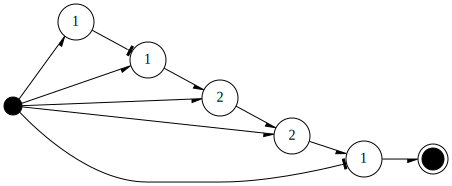

In [8]:
src

In [9]:
print(f"Initial thresholds : \n{mng.get_thresholds()}")

for i in range(3):
    #Send a signal
    sns.feed([[1]])
    #Combined update
    mng.update()
    
#Pause update without signal/signal=0
mng.update()
print(f"Final thresholds at time {mng.time} : \n{mng.get_thresholds()}")

Initial thresholds : 
[0, 0, 0, 0, 0]
[1]
I : 1
signaled
Thresholds at time 0 after the signal: 
[1, 1, 1, 1, -1]
Threshold outputs at time 0
thr_NTTK --| wire_3LVE
thr_Z84L --> wire_7V6K
Thresholds at time 0 after threshold update: 
[0, 0, 0, 0, 0]
Wire outputs at time 0
thr_NTTK --| thr_Z84L with : wire_3LVE
thr_Z84L --> thr_SFXD with : wire_7V6K
thr_SFXD --- thr_6YOC with : wire_MZ8I
thr_6YOC --- thr_2NF7 with : wire_CSWU
thr_2NF7 --- act_RXRZ with : wire_IT36
Thresholds at time 0 after wire update: 
[0, -1, 1, 0, 0]
[1]
I : 1
signaled
Thresholds at time 1 after the signal: 
[1, 0, 2, 1, -1]
Threshold outputs at time 1
thr_NTTK --| wire_3LVE
thr_SFXD --> wire_MZ8I
Thresholds at time 1 after threshold update: 
[0, 0, 0, 0, 0]
Wire outputs at time 1
thr_NTTK --| thr_Z84L with : wire_3LVE
thr_Z84L --- thr_SFXD with : wire_7V6K
thr_SFXD --> thr_6YOC with : wire_MZ8I
thr_6YOC --- thr_2NF7 with : wire_CSWU
thr_2NF7 --- act_RXRZ with : wire_IT36
Thresholds at time 1 after wire update: 
[0,